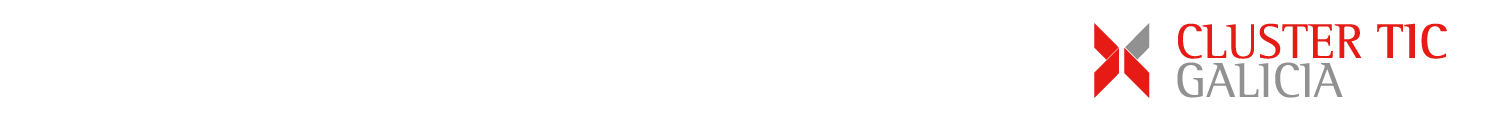
<a name = "inicio"></a>

<div style="font-size: 50px;text-align: center;height:70px;line-height: 60px;padding:10px;margin:10px 0 0 0;">Funciones universales (ufuncs)</div>

1. [Funciones universales](#Funciones-universales)
1. [Funciones universales matemáticas](#Funciones-universales-matemáticas)
1. [Funciones universales trigonométricas](#Funciones-universales-trigonométricas)
1. [Funciones universales lógicas](#Funciones-universales-lógicas)
1. [Funciones universales a nivel de bits (bit-twiddling)](#Funciones-universales-a-nivel-de-bits-(bit-twiddling))

In [1]:
import numpy as np

# Funciones universales

https://docs.scipy.org/doc/numpy/reference/ufuncs.html

Las **ufunc**, o **funciones universales**, son un componente clave de la librería NumPy que proporciona la capacidad de realizar operaciones elemento por elemento ("*element wise*") en arrays de manera eficiente y rápida. Estas operaciones incluyen no solo operaciones aritméticas básicas como suma, resta, multiplicación y división de arrays, sino también operaciones más complejas como funciones trigonométricas, operaciones exponenciales y logarítmicas, y otras.

Las *ufunc* son "universales" en el sentido de que funcionan sobre arrays de manera generalizada, permitiendo la vectorización de operaciones. La vectorización -tal y como ya se ha comentado previamente- hace referencia a la capacidad de realizar operaciones elemento por elemento sin necesidad de escribir bucles explícitos en Python, lo que resulta mucho menos eficiente.

### Características clave de las ufunc

* **Operaciones wise-element**: Las ufunc operan en cada elemento de un array de forma independiente del resto.
* **Broadcasting**: Las ufunc soportan el *broadcasting*, que ya hemos visto que permite la ejecución de operaciones en arrays de diferentes tamaños, adaptándolos automáticamente para que tengan formas compatibles.
* **Type casting**: Las ufunc determinan el tipo de dato del resultado automáticamente basándose en los tipos de los operandos, lo que facilita la interoperabilidad y reduce la necesidad de especificar tipos de datos manualmente.
* **Flexibilidad**: Además de operar en arrays completos, las ufunc también pueden trabajar sobre *slices* (rebanadas) de arrays, permitiendo una gran flexibilidad en el procesamiento de datos.
* **Eficiencia**: Las *ufunc* están implementadas en C y utilizan bucles eficientes específicos del tipo de datos, lo que las hace mucho más rápidas que las operaciones realizadas mediante bucles en Python puro.

Un ejemplo que, a estas alturas, resultará obvio:

In [2]:
a = np.array([1, 2, 3])
a

array([1, 2, 3])

In [3]:
b = np.array([2., 3., 4.])
b

array([2., 3., 4.])

In [4]:
np.multiply(a, b)

array([ 2.,  6., 12.])

Vemos cómo, efectivamente, la función **numpy.multiply()** ha recorrido los dos arrays *a* y *b* (de tipo "*int*" y "*float*", respectivamente) multiplicando sus elementos por parejas (1 y 2, 2 y 3, y 3 y 4) y adaptando el tipo del resultado de forma automática.

O la función **np.sin()**, que devuelve el seno de cada valor del array:

In [5]:
a = np.array([1, 2, 3])
np.sin(a)

array([0.84147098, 0.90929743, 0.14112001])

Obsérvese que, al considerar los elementos uno por uno (o por parejas, como hemos visto), las *ufunc* siempre van a devolver un array de las mismas dimensiones que aquellos que involucremos en la función (o, en el caso de aplicarse el *broadcasting*, un array de las mismas dimensiones que el mayor array que involucremos en la función).

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# Funciones universales matemáticas

Este grupo de funciones involucran diferentes operadores matemáticos:

### numpy.add()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.add.html

La función **numpy.add()** suma los elementos de dos estructuras "tipo array" elemento por elemento:

In [6]:
a = np.array([1, 2, 3])
b = np.array([2, 3, 4])
np.add(a, b)

array([3, 5, 7])

### numpy.subtract()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.subtract.html

La función **numpy.subtract()** resta a los valores de un array los de otro:

In [7]:
a = np.array([1, 2, 3])
b = np.array([3, 1, 0])
np.subtract(a, b)

array([-2,  1,  3])

### numpy.multiply()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.multiply.html

La función **numpy.multiply()** multiplica los valores de las dos estructuras:

In [8]:
a = np.array([1, 2, 3])
b = np.array([2, 3, 4])
np.multiply(a, b)

array([ 2,  6, 12])

### numpy.divide()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.divide.html

La función **numpy.divide()** divide los elementos de una de las estructuras por los elementos de la otra:

In [9]:
a = np.array([4, 7, 8])
b = np.array([2, 3, 3])
np.divide(a, b)

array([2.        , 2.33333333, 2.66666667])

### numpy.power()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.power.html

La función **numpy.power()** eleva cada elemento de la primera estructura al elemento correspondiente de la segunda estructura:

In [10]:
a = np.array([1, 2, 3])
b = np.array([2, 3, 4])
np.power(a, b)

array([ 1,  8, 81])

### numpy.rint()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.rint.html

La función **numpy.rint()** acepta como argumento una estructura tipo array y redondea sus elementos al entero más próximo:

In [11]:
a = np.array([0.1, 2.7, 3.0, -0.2, -0.9, -1.1])
a

array([ 0.1,  2.7,  3. , -0.2, -0.9, -1.1])

In [12]:
np.rint(a)

array([ 0.,  3.,  3., -0., -1., -1.])

Esta función no preserva el tipo del array:

In [13]:
a = np.array([2, 5, -1])
a.dtype

dtype('int32')

In [14]:
np.rint(a).dtype

dtype('float64')

### numpy.sign()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.sign.html

La función **numpy.sign()** acepta como argumento una estructura tipo array y devuelve otro array del mismo tamaño con valores que indican el signo de los elementos del array de entrada (1 si el elemento es positivo, 0 si es cero, y -1 si el elemento es negativo):

In [15]:
a = np.array([3, -2, 0, 2, -4])
np.sign(a)

array([ 1, -1,  0,  1, -1])

### numpy.exp()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html

La función **numpy.exp()** calcula la exponencial de los elementos del array pasado como argumento:

In [16]:
a = np.array([-1, 0, 1, 2, 3])
np.exp(a)

array([ 0.36787944,  1.        ,  2.71828183,  7.3890561 , 20.08553692])

### numpy.log()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.log.html

La función **numpy.log()** devuelve el logaritmo neperiano o natural de los elementos del array de entrada:

In [17]:
a = np.array([0.36787944, 1, 2.71828183, 7.3890561, 20.08553692])
np.log(a)

array([-1.,  0.,  1.,  2.,  3.])

### numpy.sqrt()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.sqrt.html

La función **numpy.sqrt()** devuelve la raíz cuadrada de los valores de la estructura de entrada:

In [18]:
a = np.array([12, 8, 64])
np.sqrt(a)

array([3.46410162, 2.82842712, 8.        ])

Lógicamente, si se encuentra un valor negativo y se está trabajando en el dominio de los números reales, se devuelve un aviso:

In [19]:
a = np.array([12, -8, 64])
np.sqrt(a)

C:\Users\danie\AppData\Local\Temp\ipykernel_28504\254734148.py:2: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(a)


array([3.46410162,        nan, 8.        ])

Esto no ocurre en el dominio de los números imaginarios:

In [20]:
a = np.array([12, -8, 64])
np.sqrt(a, dtype = "complex")

array([3.46410162+0.j        , 0.        +2.82842712j,
       8.        +0.j        ])

### numpy.square()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.square.html

La función **numpy.square()** devuelve el cuadrado de los elementos de la estructura de entrada:

In [21]:
a = np.array([-2, 0, 2, 5])
np.square(a)

array([ 4,  0,  4, 25])

### numpy.gcd()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.gcd.html

La función **numpy.gcd()** devuelve el máximo común divisor de los elementos de las dos estructuras de entrada:

In [22]:
a = np.array([15, 20, 18])
b = np.array([3, 4, 2])
np.gcd(a, b)

array([3, 4, 2])

Los argumentos no tienen por qué ser ambos arrays:

In [23]:
a = np.array([15, 20, 18])
np.gcd(a, 10)

array([ 5, 10,  2])

De hecho, ambos argumentos podrían ser escalares:

In [24]:
np.gcd(18, 60)

6

### numpy.lcm()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.lcm.html

De forma semejante, la función **numpy.lcm(** devuelve el mínimo común múltiplo de los elementos de las dos estructuras de entrada, tanto si son arrays como si son escalares:

In [25]:
a = np.array([15, 20, 18])
b = np.array([3, 6, 5])
np.lcm(a, b)

array([15, 60, 90])

In [26]:
a = np.array([15, 20, 18])
np.lcm(a, 93)

array([ 465, 1860,  558])

In [27]:
np.lcm(15, 93)

465

### numpy.maximum()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.maximum.html

La función **numpy.maximum()** evalúa el valor máximo de las estructuras de entrada comparando elemento a elemento:

In [28]:
a = np.array([5, 2, 2])
b = np.array([2, 3, 2])
np.maximum(a, b)

array([5, 3, 2])

### numpy.minimum()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.minimum.html

La función **numpy.minimum()** evalúa el valor mínimo de las estructuras de entrada comparando elemento a elemento:

In [29]:
a = np.array([5, 2, 2])
b = np.array([2, 3, 2])
np.minimum(a, b)

array([2, 2, 2])

### numpy.floor()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.floor.html

La función **numpy.floor()** devuelve el mayor entero menor o igual que los elementos de la estructura de entrada:

In [30]:
a = np.array([-2.9, -2.1, 0, 1.1, 1.9])
np.floor(a)

array([-3., -3.,  0.,  1.,  1.])

### numpy.ceil()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.ceil.html

La función **numpy.ceil()** devuelve el menor entero mayor o igual que los elemento de la estructura de entrada:

In [31]:
a = np.array([-2.9, -2.1, 0, 1.1, 1.9])
np.ceil(a)

array([-2., -2.,  0.,  2.,  2.])

### numpy.trunc()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.trunc.html

La función **numpy.trunc()** devuelve los elementos de la estructura de entrada truncados. El valor truncado de un número es el entero más próximo al mismo que está más cerca del cero que el propio elemento:

In [32]:
a = np.array([-3.1, -2.9, -2.1, 0, 1.1, 1.9, 2.1, 3.1])
np.trunc(a)

array([-3., -2., -2.,  0.,  1.,  1.,  2.,  3.])

### numpy.round()

https://numpy.org/devdocs/reference/generated/numpy.round.html

La función **numpy.round()** (también accesible como **numpy.around()**) devuelve un array equivalente al pasado como argumento tras sustituir cada elemento por la versión redondeada a un cierto número de decimales. El número de decimales se indica como segundo argumento:

In [33]:
m = np.array([1.231, 2.459, -2.102, -4.109])
np.round(m, 2)

array([ 1.23,  2.46, -2.1 , -4.11])

Como puede apreciarse, el último decimal conservado se redondea según el primero eliminado.

Esta funcionalidad también está disponible en el método **.round()**:

In [34]:
m.round(2)

array([ 1.23,  2.46, -2.1 , -4.11])

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# Funciones universales trigonométricas

Este grupo de funciones aplican funciones trigonométricas a los valores del array. Todas ellas utilizan radianes por defecto. Veamos algunas de estas funciones:

### numpy.sin()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.sin.html

La función **numpy.sin()** devuelve el seno de los elementos de la estructura de entrada:

In [35]:
a = np.array([-1.57079633, -0.52359878, 0., 0.52359878, 1.57079633])
np.sin(a)

array([-1. , -0.5,  0. ,  0.5,  1. ])

### numpy.cos()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.cos.html

La función **numpy.cos()** devuelve el coseno de los elementos de la estructura de entrada:

In [36]:
a = np.array([3.14159265, 2.0943951, 1.57079633, 1.04719755, 0.])
np.cos(a)

array([-1.00000000e+00, -4.99999998e-01, -3.20510345e-09,  5.00000001e-01,
        1.00000000e+00])

### numpy.tan()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.tan.html

La función **numpy.tan()** devuelve la tangente de los elementos del arrat de entrada:

In [37]:
a = np.array([-1.57079633, -0.52359878, 0., 0.52359878, 1.57079633])
np.tan(a)

array([ 3.12002409e+08, -5.77350275e-01,  0.00000000e+00,  5.77350275e-01,
       -3.12002409e+08])

### numpy.arcsin()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.arcsin.html

La función **numpy.arcsin()** devuelve el arcoseno de los elementos de la estructura de entrada:

In [38]:
a = np.array([-1, -0.5, 0, 0.5, 1])
np.arcsin(a)

array([-1.57079633, -0.52359878,  0.        ,  0.52359878,  1.57079633])

### numpy.arccos()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.arccos.html

La función **numpy.arccos()** devuelve el arcocoseno de los elementos de la estructura de entrada:

In [39]:
a = np.array([-1, -0.5, 0, 0.5, 1])
np.arccos(a)

array([3.14159265, 2.0943951 , 1.57079633, 1.04719755, 0.        ])

### numpy.arctan()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.arctan.html

La función **numpy.arctan()** devuelve la arcotangente de los elementos de la estructura de entrada:

In [40]:
a = np.array([-1, -0.5, 0, 0.5, 1])
np.arctan(a)

array([-0.78539816, -0.46364761,  0.        ,  0.46364761,  0.78539816])

### numpy.deg2rad()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.deg2rad.html

La función **numpy.deg2rad()** convierte ángulos de grados sexagesimales a radianes:

In [41]:
a = np.array([-360, -270, -180, -90, 0, 90, 180, 270, 360])
np.deg2rad(a)

array([-6.28318531, -4.71238898, -3.14159265, -1.57079633,  0.        ,
        1.57079633,  3.14159265,  4.71238898,  6.28318531])

### numpy.rad2deg()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.rad2deg.html

Equivalente a la anterior, convierte ángulos de radianes a grados sexagesimales:

In [42]:
a = np.array([-6.28318531, -3.14159265, 0, 3.14159265, 6.28318531])
np.rad2deg(a)

array([-360.00000016, -179.99999979,    0.        ,  179.99999979,
        360.00000016])

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# Funciones universales lógicas

Cuando involucremos arrays en expresiones lógicas es importante que recordemos que los operadores de Python **and** y **or** no van a tener el efecto esperado, pues van a evaluar "el valor verdadero del array completo", no se van a aplicar elemento por elemento. En su lugar deberemos utilizar los operadores **&#38;** y **&#124;**, respectivamente.

Veamos algunas de las funciones universales de este tipo disponibles:

### numpy.equal()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.equal.html

La función **numpy.equal()** devuelve el valor verdadero de la comparación x1 == x2, comparando elemento a elemento:

In [43]:
a = np.array([5, 2, 2])
b = np.array([2, 3, 2])
np.equal(a, b)

array([False, False,  True])

### numpy.not_equal()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.not_equal.html

La función **numpy.not_equal()** devuelve el valor verdadero de la comparación x1 ≠ x2, comparando elemento a elemento:

In [44]:
a = np.array([5, 2, 2])
b = np.array([2, 3, 2])
np.not_equal(a, b)

array([ True,  True, False])

### numpy.greater()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.greater.html

La función **numpy.greater()** devuelve el valor verdadero de la comparación x1 > x2, comparando elemento a elemento:

In [45]:
a = np.array([5, 2, 3])
b = np.array([2, 3, 2])
np.greater(a, b)

array([ True, False,  True])

### numpy.greater_equal()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.greater_equal.html

La función **numpy.greater_equal()** devuelve el valor verdadero de la comparación x1 ≥ x2, comparando elemento a elemento:

In [46]:
a = np.array([5, 3, 3])
b = np.array([2, 3, 2])
np.greater_equal(a, b)

array([ True,  True,  True])

### numpy.less()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.less.html

La función **numpy.less()** devuelve el valor verdadero de la comparación x1 < x2, comparando elemento a elemento:

In [47]:
a = np.array([5, 2, 3])
b = np.array([2, 3, 2])
np.less(a, b)

array([False,  True, False])

### numpy.less_equal()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.less_equal.html

La función **numpy.less_equal()** devuelve el valor verdadero de la comparación x1 ≤ x2, comparando elemento a elemento:

In [48]:
a = np.array([5, 2, 2])
b = np.array([2, 3, 2])
np.less_equal(a, b)

array([False,  True,  True])

Otras funciones aplican operaciones lógicas entre booleanos. En el caso de que los valores no sean booleanos, los valores no nulos (o no vacíos) se interpretan como *True* y los nulos (o vacíos) como *False*.

### numpy.logical_and()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.logical_and.html

La función **numpy.logical_and()** evalúa el valor verdadero de x1 AND x2, comparando elemento a elemento:

In [49]:
a = np.array([True, False, True])
b = np.array([True, True, False])
np.logical_and(a, b)

array([ True, False, False])

In [50]:
a = np.array([True, False, True])
b = np.array([1, -1, 0])
np.logical_and(a, b)

array([ True, False, False])

### numpy.logical_or()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.logical_or.html

La función **numpy.logical_or()** evalúa el valor verdadero de x1 OR x2, comparando elemento a elemento:

In [51]:
a = np.array([True, False, False])
b = np.array([True, True, False])
np.logical_or(a, b)

array([ True,  True, False])

### numpy.logical_xor()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.logical_xor.html

La función **numpy.logical_xor()** evalúa el valor verdadero de x1 XOR x2, comparando elemento a elemento:

In [52]:
a = np.array([True, False, False])
b = np.array([True, True, False])
np.logical_xor(a, b)

array([False,  True, False])

### numpy.logical_not()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.logical_not.html

La función **numpy.logical_not()** aplica el operador lógico NOT a los elementos de la estructura de entrada:

In [53]:
a = np.array([True, False, False])
np.logical_not(a)

array([False,  True,  True])

### numpy.isnan()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.isnan.html

La función **numpy.isnan()** evalúa si los elementos de la estructura de entrada son NaN (*Not a Number*):

In [54]:
a = np.array([5, 2, np.nan])
np.isnan(a)

array([False, False,  True])

En NumPy se puede generar un NaN con la constante **np.nan**, tal y como acabamos de ver en el ejemplo anterior.

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# Funciones universales a nivel de bits (bit-twiddling)

Estas funciones se aplican a los elementos del array a nivel de bit. Por ejemplo:

### numpy.bitwise_and()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.bitwise_and.html

Esta función aplica un "y-lógico" a nivel de bit:

In [55]:
a = np.array([0, 4]) # 0000 y 0100
a

array([0, 4])

In [56]:
b = np.array([1, 7]) #0001 y 0111
b

array([1, 7])

In [57]:
np.bitwise_and(a, b) #0000 y 0100

array([0, 4])

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>